In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import statistics
import seaborn as sns

## Analysis 1: How much is the RMSE for this regression (in seconds)?

Use the following variables as independent variables: start longitude, start latitude, end longitude, and end latitude. Use the trip total time as a dependent variable and perform multiple linear regression. Set random_state to 0 and the test_size to 0.2 when performing training and test data split.

In [2]:
# importing dataframe
bike_data = pd.read_csv('all_bike_data.csv')

# dropping rows of data with non-numeric values
bike_data = bike_data.dropna()

In [3]:
### finding total time values

# convert data to datetime values in order to compute
end_at_timestamp = pd.to_datetime(bike_data.ended_at)
start_at_timestamp = pd.to_datetime(bike_data.started_at)

# find difference between start and end to get total time
total_time = end_at_timestamp - start_at_timestamp

# convert total_time to list
total_time = total_time.tolist()

# convert total
total_time = [td.total_seconds() for td in total_time]

# add total_time data to dataframe
bike_data['total_time'] = total_time

In [4]:
# select features to use as IV's for multiple linear regression model
features = ['start_lng', 'start_lat', 'end_lng', 'end_lat']

In [5]:
# set up traintestsplit model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bike_data[features], bike_data['total_time'], test_size = 0.2, random_state=0)

In [6]:
# perform linear regression on traintestsplit data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X_train = X_train.dropna()
y_train = y_train[X_train.index] 
model.fit(X=X_train, y=y_train)

LinearRegression()

In [7]:
# use model to predict y values
predictions = model.predict(X_test)

# convert predictions from array to list
predictions = predictions.tolist()

In [8]:
# find mean squared error using y_test values and y prediction values
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)

In [9]:
# find square root of mean squared error to get rmse
rmse = mse ** 0.5
rmse

1894.1835558387822

## Analysis 2: Does filtering to only members improve our model's prediction capabilities?

Let's do better at estimating time taken by considering a particular target audience. Bluebikes can have two types of users-- casual users or members who are subscribed to a membership and have potential to be regular blue bike users. For this analysis, consider only the members, but use the same independent variables.

In [10]:
# create new dataframe where only member's data is used
member_data = bike_data[bike_data['member_casual'] == 'member']
member_data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,total_time
0,68B619BB8F5938F6,classic_bike,2024-06-27 15:40:33.729,2024-06-27 15:44:55.420,Cambridge Main Library at Broadway / Trowbridg...,M32013,Central Sq Post Office / Cambridge City Hall a...,M32012,42.373379,-71.111075,42.366426,-71.105495,member,261.691
1,01F1130C0E47858C,classic_bike,2024-06-23 10:15:12.915,2024-06-23 10:22:34.652,Cambridge Main Library at Broadway / Trowbridg...,M32013,Harvard Square at Brattle St / Eliot St,M32017,42.373379,-71.111075,42.373329,-71.120986,member,441.737
2,BE120AAA9C5ADEE2,classic_bike,2024-06-21 08:49:22.787,2024-06-21 08:59:18.465,Cambridge Main Library at Broadway / Trowbridg...,M32013,Galileo Galilei Way at Fulkerson St/Binney St,M32078,42.373379,-71.111075,42.366420,-71.088542,member,595.678
3,BF4646DF4296D41E,classic_bike,2024-06-13 19:47:23.335,2024-06-13 19:56:53.372,O'Brien Highway at First Street,M32090,Cambridge Dept. of Public Works -147 Hampshire...,M32052,42.370982,-71.076638,42.371197,-71.097599,member,570.037
4,2162825F11FF90B4,classic_bike,2024-06-07 17:20:19.809,2024-06-07 17:28:43.494,Cambridge Main Library at Broadway / Trowbridg...,M32013,Mass Ave at Albany St,M32061,42.373379,-71.111075,42.361358,-71.096703,member,503.685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478836,6468FA1E10CCF208,electric_bike,2024-06-20 17:33:36.063,2024-06-20 18:11:20.961,Savin Hill T Stop - S Sydney St at Bay St,C32033,Savin Hill T Stop - S Sydney St at Bay St,C32033,42.310496,-71.053807,42.310600,-71.053900,member,2264.898
478837,2C6852D64B849CF7,classic_bike,2024-06-15 15:15:31.764,2024-06-15 15:46:11.956,Medford Sq - Riverside Ave at River St,F32002,Medford Sq - Riverside Ave at River St,F32002,42.417724,-71.108102,42.417724,-71.108102,member,1840.192
478838,E2358581591FDC70,classic_bike,2024-06-28 17:54:48.134,2024-06-28 18:27:21.032,Medford Sq - Riverside Ave at River St,F32002,Medford Sq - Riverside Ave at River St,F32002,42.417724,-71.108102,42.417724,-71.108102,member,1952.898
478858,228BCA0466B44CAF,classic_bike,2024-06-06 10:56:02.638,2024-06-06 10:57:08.745,Medford Sq - Riverside Ave at River St,F32002,Medford Sq - Riverside Ave at River St,F32002,42.417724,-71.108102,42.417724,-71.108102,member,66.107


In [11]:
# select features to use as IV's for multiple linear regression model
features = ['start_lng', 'start_lat', 'end_lng', 'end_lat']

In [12]:
# set up traintestsplit model
from sklearn.model_selection import train_test_split
X_train_member, X_test_member, y_train_member, y_test_member = train_test_split(member_data[features], member_data['total_time'], test_size = 0.2, random_state=0)

In [13]:
# perform linear regression on traintestsplit data
from sklearn.linear_model import LinearRegression
model_member = LinearRegression()
X_train_member = X_train_member.dropna()
y_train_member = y_train_member[X_train_member.index] 
model_member.fit(X=X_train_member, y=y_train_member)

LinearRegression()

In [14]:
# use model to predict y values
predictions_member = model_member.predict(X_test_member)

# convert predictions from array to list
predictions_member = predictions_member.tolist()

In [15]:
# find mean squared error using y_test values and y prediction values
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_member, predictions_member)

# find square root of mean squared error to get rmse
rmse = mse ** 0.5
rmse

1251.4877815733466

## Analysis 3: What is our RMSE for this regression in seconds?

Let's try something else. In addition to the filtering of members, let's filter out people that we suspect may be outliers to our data (if this was a project, you would do an exploration to identify outliers, but we've done that for you). Filter out the following data and perform multiple linear regression analysis again:

(a) total time for the trip was more than an hour

(b) trip was taken on a weekend (i.e. days of the week were Saturday or Sunday)

(c) trips that are on electric bikes


In [16]:
# filter out trips more than an hour
filtered_data = member_data[member_data['total_time'] < 3600]

# convert started_at values to datetime data
filtered_data['started_at'] = pd.to_datetime(filtered_data['started_at'])

# add day of week column using started_at datetime data
filtered_data['day_of_week'] = filtered_data['started_at'].dt.day_name()

# filter out weekend trips
filtered_data = filtered_data[~filtered_data['day_of_week'].isin(['Saturday', 'Sunday'])]

# filter out electric bike trips
filtered_data = filtered_data[filtered_data['rideable_type'] != 'electric_bike']
filtered_data

/var/folders/v1/t23mr4xd4n5_t_phjp0y27440000gp/T/ipykernel_52265/2443440381.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['started_at'] = pd.to_datetime(filtered_data['started_at'])
/var/folders/v1/t23mr4xd4n5_t_phjp0y27440000gp/T/ipykernel_52265/2443440381.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['day_of_week'] = filtered_data['started_at'].dt.day_name()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,total_time,day_of_week
0,68B619BB8F5938F6,classic_bike,2024-06-27 15:40:33.729,2024-06-27 15:44:55.420,Cambridge Main Library at Broadway / Trowbridg...,M32013,Central Sq Post Office / Cambridge City Hall a...,M32012,42.373379,-71.111075,42.366426,-71.105495,member,261.691,Thursday
2,BE120AAA9C5ADEE2,classic_bike,2024-06-21 08:49:22.787,2024-06-21 08:59:18.465,Cambridge Main Library at Broadway / Trowbridg...,M32013,Galileo Galilei Way at Fulkerson St/Binney St,M32078,42.373379,-71.111075,42.366420,-71.088542,member,595.678,Friday
3,BF4646DF4296D41E,classic_bike,2024-06-13 19:47:23.335,2024-06-13 19:56:53.372,O'Brien Highway at First Street,M32090,Cambridge Dept. of Public Works -147 Hampshire...,M32052,42.370982,-71.076638,42.371197,-71.097599,member,570.037,Thursday
4,2162825F11FF90B4,classic_bike,2024-06-07 17:20:19.809,2024-06-07 17:28:43.494,Cambridge Main Library at Broadway / Trowbridg...,M32013,Mass Ave at Albany St,M32061,42.373379,-71.111075,42.361358,-71.096703,member,503.685,Friday
5,CD76F7499005F70D,classic_bike,2024-06-24 07:49:14.232,2024-06-24 08:04:20.307,Cambridge Main Library at Broadway / Trowbridg...,M32013,Blossom St at Charles St,D32050,42.373379,-71.111075,42.364356,-71.069594,member,906.075,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478819,5049672D99E1563E,classic_bike,2024-06-06 18:07:42.961,2024-06-06 18:36:44.233,Medford Sq - Riverside Ave at River St,F32002,Medford Sq - Riverside Ave at River St,F32002,42.417724,-71.108102,42.417724,-71.108102,member,1741.272,Thursday
478824,29819328B0295CE7,classic_bike,2024-06-13 07:51:48.447,2024-06-13 07:55:17.654,Savin Hill T Stop - S Sydney St at Bay St,C32033,Savin Hill T Stop - S Sydney St at Bay St,C32033,42.310600,-71.053900,42.310600,-71.053900,member,209.207,Thursday
478835,0F508D8F9C25FCA4,classic_bike,2024-06-25 16:12:11.878,2024-06-25 16:31:00.681,Savin Hill T Stop - S Sydney St at Bay St,C32033,Savin Hill T Stop - S Sydney St at Bay St,C32033,42.310600,-71.053900,42.310600,-71.053900,member,1128.803,Tuesday
478838,E2358581591FDC70,classic_bike,2024-06-28 17:54:48.134,2024-06-28 18:27:21.032,Medford Sq - Riverside Ave at River St,F32002,Medford Sq - Riverside Ave at River St,F32002,42.417724,-71.108102,42.417724,-71.108102,member,1952.898,Friday


In [17]:
# SET UP MULTIPLE LINEAR REGRESSION

In [18]:
# select features to use as IV's for multiple linear regression model
features = ['start_lng', 'start_lat', 'end_lng', 'end_lat']

In [19]:
# set up traintestsplit model
from sklearn.model_selection import train_test_split
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(filtered_data[features], filtered_data['total_time'], test_size = 0.2, random_state=0)

In [20]:
# perform linear regression on traintestsplit data
from sklearn.linear_model import LinearRegression
model_filtered = LinearRegression()
X_train_filtered = X_train_filtered.dropna()
y_train_filtered = y_train_filtered[X_train_filtered.index] 
model_filtered.fit(X=X_train_filtered, y=y_train_filtered)

LinearRegression()

In [21]:
# use model to predict y values
predictions_filtered = model_filtered.predict(X_test_filtered)

# convert predictions from array to list
predictions_filtered = predictions_filtered.tolist()

In [22]:
# find mean squared error using y_test values and y prediction values
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_filtered, predictions_filtered)

# find square root of mean squared error to get rmse
rmse = mse ** 0.5
rmse

523.1391322945138

## Analysis 4: If a person were to take a bluebike trip that is about 1000 meters, what would you predict the time taken for the trip to be, approximately?

Instead of considering location data as four separate independent variables, consider using the Haversine distance between the start and end locations. You are welcome to use existing libraries for this or implement your own function. Build on top of your model from Analysis 3 and perform linear regression with the Haversine distance (in meters) as your independent variable to predict trip time (the dependent variable).

In [23]:
import math
from haversine import haversine, Unit

In [24]:
# apply the haversine function row by row
filtered_data['distance_in_meters'] = filtered_data.apply(
    lambda row: haversine(
        (row['start_lat'], row['start_lng']), 
        (row['end_lat'], row['end_lng']), 
        unit='m'), axis=1)

filtered_data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,total_time,day_of_week,distance_in_meters
0,68B619BB8F5938F6,classic_bike,2024-06-27 15:40:33.729,2024-06-27 15:44:55.420,Cambridge Main Library at Broadway / Trowbridg...,M32013,Central Sq Post Office / Cambridge City Hall a...,M32012,42.373379,-71.111075,42.366426,-71.105495,member,261.691,Thursday,898.822807
2,BE120AAA9C5ADEE2,classic_bike,2024-06-21 08:49:22.787,2024-06-21 08:59:18.465,Cambridge Main Library at Broadway / Trowbridg...,M32013,Galileo Galilei Way at Fulkerson St/Binney St,M32078,42.373379,-71.111075,42.366420,-71.088542,member,595.678,Friday,2006.353136
3,BF4646DF4296D41E,classic_bike,2024-06-13 19:47:23.335,2024-06-13 19:56:53.372,O'Brien Highway at First Street,M32090,Cambridge Dept. of Public Works -147 Hampshire...,M32052,42.370982,-71.076638,42.371197,-71.097599,member,570.037,Thursday,1722.094449
4,2162825F11FF90B4,classic_bike,2024-06-07 17:20:19.809,2024-06-07 17:28:43.494,Cambridge Main Library at Broadway / Trowbridg...,M32013,Mass Ave at Albany St,M32061,42.373379,-71.111075,42.361358,-71.096703,member,503.685,Friday,1783.473714
5,CD76F7499005F70D,classic_bike,2024-06-24 07:49:14.232,2024-06-24 08:04:20.307,Cambridge Main Library at Broadway / Trowbridg...,M32013,Blossom St at Charles St,D32050,42.373379,-71.111075,42.364356,-71.069594,member,906.075,Monday,3552.457070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478819,5049672D99E1563E,classic_bike,2024-06-06 18:07:42.961,2024-06-06 18:36:44.233,Medford Sq - Riverside Ave at River St,F32002,Medford Sq - Riverside Ave at River St,F32002,42.417724,-71.108102,42.417724,-71.108102,member,1741.272,Thursday,0.000000
478824,29819328B0295CE7,classic_bike,2024-06-13 07:51:48.447,2024-06-13 07:55:17.654,Savin Hill T Stop - S Sydney St at Bay St,C32033,Savin Hill T Stop - S Sydney St at Bay St,C32033,42.310600,-71.053900,42.310600,-71.053900,member,209.207,Thursday,0.000000
478835,0F508D8F9C25FCA4,classic_bike,2024-06-25 16:12:11.878,2024-06-25 16:31:00.681,Savin Hill T Stop - S Sydney St at Bay St,C32033,Savin Hill T Stop - S Sydney St at Bay St,C32033,42.310600,-71.053900,42.310600,-71.053900,member,1128.803,Tuesday,0.000000
478838,E2358581591FDC70,classic_bike,2024-06-28 17:54:48.134,2024-06-28 18:27:21.032,Medford Sq - Riverside Ave at River St,F32002,Medford Sq - Riverside Ave at River St,F32002,42.417724,-71.108102,42.417724,-71.108102,member,1952.898,Friday,0.000000


In [25]:
# set up traintestsplit model
from sklearn.model_selection import train_test_split
X_train_distance, X_test_distance, y_train_distance, y_test_distance = train_test_split(filtered_data[['distance_in_meters']], filtered_data['total_time'], test_size = 0.2, random_state=0)

In [26]:
# perform linear regression on traintestsplit data
from sklearn.linear_model import LinearRegression
model_distance = LinearRegression()

model_distance.fit(X_train_distance, y_train_distance)

LinearRegression()

In [27]:
# use model to predict y values
predictions_distance = model_distance.predict(X_test_distance)

# convert predictions from array to list
predictions_distance = predictions_distance.tolist()

In [28]:
# predict total trip time for a trip distance of 1000 meters
prediction_1000_meters = model_distance.predict([[1000]])[0]

# convert from seconds to minutes
prediction_1000_meters/60

/Users/wesleychapman/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


8.322476561456233

In [29]:
# find mean squared error using y_test values and y prediction values
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_distance, predictions_distance)

# find square root of mean squared error to get rmse
rmse = mse ** 0.5
rmse

362.1844756686633

## Analysis 5: What is the mean accuracy for the regression model?

For this analysis, use ALL of the biking data (not filtered data). Use the following variables as features: haversine distance (in meters), member/casual status, and rideable type. Note that you might need to transform some of this nominal data into binary values. Your target (label) should be 1 if the trip total time was more than 30 minutes, 0 otherwise.

To evaluate your logistic regression model, use cross-fold validation. 

In [30]:
# apply the haversine function row by row
bike_data['distance_in_meters'] = bike_data.apply(
    lambda row: haversine(
        (row['start_lat'], row['start_lng']), 
        (row['end_lat'], row['end_lng']), 
        unit='m'), axis=1)
bike_data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,total_time,distance_in_meters
0,68B619BB8F5938F6,classic_bike,2024-06-27 15:40:33.729,2024-06-27 15:44:55.420,Cambridge Main Library at Broadway / Trowbridg...,M32013,Central Sq Post Office / Cambridge City Hall a...,M32012,42.373379,-71.111075,42.366426,-71.105495,member,261.691,898.822807
1,01F1130C0E47858C,classic_bike,2024-06-23 10:15:12.915,2024-06-23 10:22:34.652,Cambridge Main Library at Broadway / Trowbridg...,M32013,Harvard Square at Brattle St / Eliot St,M32017,42.373379,-71.111075,42.373329,-71.120986,member,441.737,814.183518
2,BE120AAA9C5ADEE2,classic_bike,2024-06-21 08:49:22.787,2024-06-21 08:59:18.465,Cambridge Main Library at Broadway / Trowbridg...,M32013,Galileo Galilei Way at Fulkerson St/Binney St,M32078,42.373379,-71.111075,42.366420,-71.088542,member,595.678,2006.353136
3,BF4646DF4296D41E,classic_bike,2024-06-13 19:47:23.335,2024-06-13 19:56:53.372,O'Brien Highway at First Street,M32090,Cambridge Dept. of Public Works -147 Hampshire...,M32052,42.370982,-71.076638,42.371197,-71.097599,member,570.037,1722.094449
4,2162825F11FF90B4,classic_bike,2024-06-07 17:20:19.809,2024-06-07 17:28:43.494,Cambridge Main Library at Broadway / Trowbridg...,M32013,Mass Ave at Albany St,M32061,42.373379,-71.111075,42.361358,-71.096703,member,503.685,1783.473714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478855,0520BD43E427FE70,electric_bike,2024-06-01 15:56:23.512,2024-06-01 18:33:17.853,Medford Sq - Riverside Ave at River St,F32002,Medford Sq - Riverside Ave at River St,F32002,42.417698,-71.108047,42.417724,-71.108102,casual,9414.341,5.320104
478856,2685ABA070A6205E,classic_bike,2024-06-06 17:19:23.857,2024-06-06 17:46:26.097,Savin Hill T Stop - S Sydney St at Bay St,C32033,Savin Hill T Stop - S Sydney St at Bay St,C32033,42.310600,-71.053900,42.310600,-71.053900,casual,1622.240,0.000000
478857,17162099FD597D78,classic_bike,2024-06-16 13:31:47.940,2024-06-16 13:47:42.519,Savin Hill T Stop - S Sydney St at Bay St,C32033,Savin Hill T Stop - S Sydney St at Bay St,C32033,42.310600,-71.053900,42.310600,-71.053900,casual,954.579,0.000000
478858,228BCA0466B44CAF,classic_bike,2024-06-06 10:56:02.638,2024-06-06 10:57:08.745,Medford Sq - Riverside Ave at River St,F32002,Medford Sq - Riverside Ave at River St,F32002,42.417724,-71.108102,42.417724,-71.108102,member,66.107,0.000000


In [31]:
import numpy as np

In [32]:
# make member_casual nominal data binary
bike_data['member_casual'] = np.where(bike_data['member_casual'] == 'member', 0, 1)

In [33]:
# make rideable_type nominal data binary
bike_data['rideable_type'] = np.where(bike_data['rideable_type'] == 'classic_bike', 0, 1)
bike_data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,total_time,distance_in_meters
0,68B619BB8F5938F6,0,2024-06-27 15:40:33.729,2024-06-27 15:44:55.420,Cambridge Main Library at Broadway / Trowbridg...,M32013,Central Sq Post Office / Cambridge City Hall a...,M32012,42.373379,-71.111075,42.366426,-71.105495,0,261.691,898.822807
1,01F1130C0E47858C,0,2024-06-23 10:15:12.915,2024-06-23 10:22:34.652,Cambridge Main Library at Broadway / Trowbridg...,M32013,Harvard Square at Brattle St / Eliot St,M32017,42.373379,-71.111075,42.373329,-71.120986,0,441.737,814.183518
2,BE120AAA9C5ADEE2,0,2024-06-21 08:49:22.787,2024-06-21 08:59:18.465,Cambridge Main Library at Broadway / Trowbridg...,M32013,Galileo Galilei Way at Fulkerson St/Binney St,M32078,42.373379,-71.111075,42.366420,-71.088542,0,595.678,2006.353136
3,BF4646DF4296D41E,0,2024-06-13 19:47:23.335,2024-06-13 19:56:53.372,O'Brien Highway at First Street,M32090,Cambridge Dept. of Public Works -147 Hampshire...,M32052,42.370982,-71.076638,42.371197,-71.097599,0,570.037,1722.094449
4,2162825F11FF90B4,0,2024-06-07 17:20:19.809,2024-06-07 17:28:43.494,Cambridge Main Library at Broadway / Trowbridg...,M32013,Mass Ave at Albany St,M32061,42.373379,-71.111075,42.361358,-71.096703,0,503.685,1783.473714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478855,0520BD43E427FE70,1,2024-06-01 15:56:23.512,2024-06-01 18:33:17.853,Medford Sq - Riverside Ave at River St,F32002,Medford Sq - Riverside Ave at River St,F32002,42.417698,-71.108047,42.417724,-71.108102,1,9414.341,5.320104
478856,2685ABA070A6205E,0,2024-06-06 17:19:23.857,2024-06-06 17:46:26.097,Savin Hill T Stop - S Sydney St at Bay St,C32033,Savin Hill T Stop - S Sydney St at Bay St,C32033,42.310600,-71.053900,42.310600,-71.053900,1,1622.240,0.000000
478857,17162099FD597D78,0,2024-06-16 13:31:47.940,2024-06-16 13:47:42.519,Savin Hill T Stop - S Sydney St at Bay St,C32033,Savin Hill T Stop - S Sydney St at Bay St,C32033,42.310600,-71.053900,42.310600,-71.053900,1,954.579,0.000000
478858,228BCA0466B44CAF,0,2024-06-06 10:56:02.638,2024-06-06 10:57:08.745,Medford Sq - Riverside Ave at River St,F32002,Medford Sq - Riverside Ave at River St,F32002,42.417724,-71.108102,42.417724,-71.108102,0,66.107,0.000000


In [34]:
# define target
bike_data['target'] = (bike_data['total_time'] > 30 * 60).astype(int)
bike_data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,total_time,distance_in_meters,target
0,68B619BB8F5938F6,0,2024-06-27 15:40:33.729,2024-06-27 15:44:55.420,Cambridge Main Library at Broadway / Trowbridg...,M32013,Central Sq Post Office / Cambridge City Hall a...,M32012,42.373379,-71.111075,42.366426,-71.105495,0,261.691,898.822807,0
1,01F1130C0E47858C,0,2024-06-23 10:15:12.915,2024-06-23 10:22:34.652,Cambridge Main Library at Broadway / Trowbridg...,M32013,Harvard Square at Brattle St / Eliot St,M32017,42.373379,-71.111075,42.373329,-71.120986,0,441.737,814.183518,0
2,BE120AAA9C5ADEE2,0,2024-06-21 08:49:22.787,2024-06-21 08:59:18.465,Cambridge Main Library at Broadway / Trowbridg...,M32013,Galileo Galilei Way at Fulkerson St/Binney St,M32078,42.373379,-71.111075,42.366420,-71.088542,0,595.678,2006.353136,0
3,BF4646DF4296D41E,0,2024-06-13 19:47:23.335,2024-06-13 19:56:53.372,O'Brien Highway at First Street,M32090,Cambridge Dept. of Public Works -147 Hampshire...,M32052,42.370982,-71.076638,42.371197,-71.097599,0,570.037,1722.094449,0
4,2162825F11FF90B4,0,2024-06-07 17:20:19.809,2024-06-07 17:28:43.494,Cambridge Main Library at Broadway / Trowbridg...,M32013,Mass Ave at Albany St,M32061,42.373379,-71.111075,42.361358,-71.096703,0,503.685,1783.473714,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478855,0520BD43E427FE70,1,2024-06-01 15:56:23.512,2024-06-01 18:33:17.853,Medford Sq - Riverside Ave at River St,F32002,Medford Sq - Riverside Ave at River St,F32002,42.417698,-71.108047,42.417724,-71.108102,1,9414.341,5.320104,1
478856,2685ABA070A6205E,0,2024-06-06 17:19:23.857,2024-06-06 17:46:26.097,Savin Hill T Stop - S Sydney St at Bay St,C32033,Savin Hill T Stop - S Sydney St at Bay St,C32033,42.310600,-71.053900,42.310600,-71.053900,1,1622.240,0.000000,0
478857,17162099FD597D78,0,2024-06-16 13:31:47.940,2024-06-16 13:47:42.519,Savin Hill T Stop - S Sydney St at Bay St,C32033,Savin Hill T Stop - S Sydney St at Bay St,C32033,42.310600,-71.053900,42.310600,-71.053900,1,954.579,0.000000,0
478858,228BCA0466B44CAF,0,2024-06-06 10:56:02.638,2024-06-06 10:57:08.745,Medford Sq - Riverside Ave at River St,F32002,Medford Sq - Riverside Ave at River St,F32002,42.417724,-71.108102,42.417724,-71.108102,0,66.107,0.000000,0


In [35]:
# define features
features = ['distance_in_meters', 'member_casual', 'rideable_type']

In [36]:
# set up cross-fold validation model
import sklearn.model_selection
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000)

In [37]:
# find scores
scores = cross_val_score(clf, bike_data[features], bike_data['target'], cv=5, scoring='accuracy')
scores

array([0.89212968, 0.88996412, 0.89148106, 0.89156475, 0.89169029])

In [38]:
# find mean accuracy
import statistics
mean_accuracy = statistics.mean(scores)
mean_accuracy

0.8913659807295972

In [39]:
# use recall as scoring method
from sklearn.metrics import make_scorer, recall_score
from sklearn.model_selection import cross_validate
scoring = {'recall': make_scorer(recall_score)}
scores = cross_validate(clf, bike_data[features], bike_data['target'], cv=5, scoring=scoring)
scores

{'fit_time': array([1.08031368, 1.29505777, 0.95013523, 1.32904315, 0.87421393]),
 'score_time': array([0.02552223, 0.0257051 , 0.02368379, 0.02680397, 0.02300596]),
 'test_recall': array([0.12003538, 0.11074746, 0.12400495, 0.1208208 , 0.12648151])}

In [40]:
# find recall mean
statistics.mean(scores['test_recall'])

0.12041802198548474

# Plot 1: Residual plot which helps in assessing the goodness-of-fit for the linear regression model in Analysis 4

A residual plot, which helps in assessing the goodness-of-fit for the linear regression model. You can use the sns.residplot( ) function to plot this. You should plot residuals (which are errors in the predicted vs the actual labelled data) on the Y-axis and the independent variable on the X-axis.

In [41]:
# compute residuals from analysis 4
residuals = y_test_distance - predictions_distance
residuals = residuals.tolist()

Text(0.5, 1.0, 'Residuals of Bike Trip Total Time Predictions vs Actual')

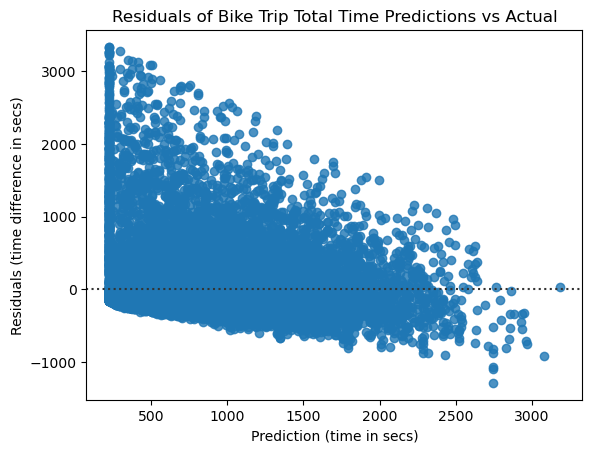

In [42]:
# create plot
import matplotlib.pyplot as plt
sns.residplot(x=predictions_distance, y=residuals)
plt.xlabel('Prediction (time in secs)')
plt.ylabel('Residuals (time difference in secs)')
plt.title('Residuals of Bike Trip Total Time Predictions vs Actual')

# Plot 2: An actual vs predicted plot. This is a scatter plot which shows the actual values (on the x axis) vs predicted values (y-axis).

An actual vs predicted plot. This is a scatter plot which shows the actual values (on the x axis) vs predicted values (y-axis). It helps understand how well the model predicts, and whether it tends to overestimate or underestimate when making predictions.

Text(0.5, 1.0, 'Actual vs Predicted Bike Trip Total Times')

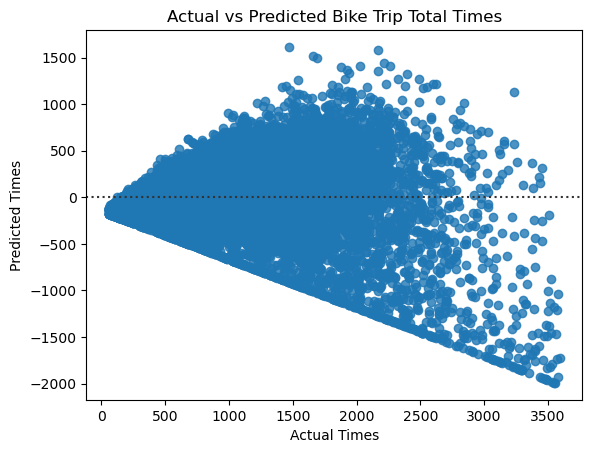

In [43]:
# create plot
import matplotlib.pyplot as plt
sns.residplot(x=y_test_distance, y=predictions_distance)
plt.xlabel('Actual Times')
plt.ylabel('Predicted Times')
plt.title('Actual vs Predicted Bike Trip Total Times')